##### This is a follow throguh of the second chapter in the book Feature Engineering.
As I could not collect the actual dataset, with wich the wrokings have been showed in the book, so, I collected another dataset from kaggle to work through the instructed processes given in the chapter.

##### Some thought processes extracted from the chapter according to my interpretation are given below.
1. Analysis fit mainly means weather the chosen model fit for the given problem.
2. Every single step requires assesment before starting a data project.
3. The expense related to predictors both financial and computational are considered. 
4. In the chapter, they categorized predictors on the basis of the source of these predictors.
5. The wholle process is an trial and error process.

In [1]:
#Importing fundamental libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating a dataframe of the data.
df = pd.read_csv('.\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Handling categorical data.

Steps:
1. Understand the categories.
2. Execute one hot encodding for nominal categories.
3. For ordinal category, number the categories accoding to their order.

##### Understanding the categorical columns

In [5]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [6]:
df = df[~(df.gender == 'Other')]

In [7]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [9]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [23]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [11]:
df.work_type.value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

##### Encoding the categorical columns

In [104]:
df['Residence_type'] = df.Residence_type.apply(lambda x: 0 if x=='Rural' else 1)

In [8]:
df['gender'] = df.gender.apply(lambda x: 0 if x=='Female' else 1)

In [12]:

df = pd.get_dummies(df, columns=['work_type'])

In [15]:
#finding the columns with boolean data type. And creating a lst of them.
def dummy_columns_list(df):
    list_of_columns = []
    for x in df.columns:
        if df[x].dtype == 'bool':
            list_of_columns.append(x)
            
    return list_of_columns
            
        
    

In [16]:
#list of boolean columns
list_of_columns = dummy_columns_list(df)

In [17]:
list_of_columns

['work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children']

In [18]:
#Converting the list of columns into 0 and 1. 
for x in list_of_columns:
    df[x] = df[x].apply(lambda i: 0 if i == False else 1)

In [21]:
# Quantifying ordinal columns according to their orders.
df['ever_married'] = df.ever_married.apply(lambda x: 0 if x=='No' else 1)

In [24]:
# Quantifying ordinal columns according to their orders.
df['smoking_status'] = np.where(df['smoking_status'] == 'never smoked', 0,
                              np.where(df['smoking_status'] == 'Unknown', 0,
                                      np.where(df['smoking_status'] == 'formerly smoked', 1,2)))


### Handling missing values.

In [26]:
#Finding out the total number of missing values in each individual column.
df.isna().sum()

id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
Residence_type               0
avg_glucose_level            0
bmi                        201
smoking_status               0
stroke                       0
work_type_Govt_job           0
work_type_Never_worked       0
work_type_Private            0
work_type_Self-employed      0
work_type_children           0
dtype: int64

Here, the number of missing value in bmi is 201. As, the number of missing value high. We are going to use KNN to solve the missing value issue.

In [27]:
#Creating a correlation matrix.
corr_matrix = df.corr()

In [28]:
#Looking into the data to see which columns are highly correlated with BMI.
bmi_corr = corr_matrix['bmi'].drop('bmi')

In [29]:
bmi_corr

id                         0.003238
gender                    -0.026164
age                        0.333314
hypertension               0.167770
heart_disease              0.041322
ever_married               0.341553
Residence_type            -0.000293
avg_glucose_level          0.175672
smoking_status             0.139570
stroke                     0.042341
work_type_Govt_job         0.079526
work_type_Never_worked    -0.028615
work_type_Private          0.208205
work_type_Self-employed    0.072634
work_type_children        -0.448779
Name: bmi, dtype: float64

In [30]:
#Creating a list of column names that are highlu correlated with BMI.
high_corr_bmi = bmi_corr[abs(bmi_corr) > .3].index.tolist() 

Create clusters using these columns.

In [32]:
#Importing necessary libraries to create a cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [33]:
#Creating a function, that will create clusters in a dataset.
def predict_bmi_knn(df, features, target, n_clusters):
    
    #Create clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df[features])
    df['cluster'] = kmeans.labels_      

In [34]:
#Predicting clusters on the basis of columns that are highly correlated with BMI.
predict_bmi_knn(df, high_corr_bmi, 'bmi', 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
#Use the cluster mean to solve the missing value issue.
df['bmi'] = df['bmi'].fillna(df.groupby('cluster')['bmi'].transform('mean').round(2))

In [38]:
#Droping the cluster column
df.drop('cluster', axis=1, inplace=True)

In [39]:
df.isnull().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
stroke                     0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
dtype: int64

##### Splitting the dataset into a training set and a testing set.

In [41]:
#Reseting the index to get a better organized dataset.
df = df.reset_index(drop=True)

In [43]:
#Importing necessary library to spkit the data set into two parts.
from sklearn.model_selection import StratifiedShuffleSplit

In [44]:
#Splitting the dataset into two datasets. One for training and one for testing.
#Using stroke column as the basis on which the data set is distributed in stratas. 
split = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
for train_index, test_index in split.split(df, df['stroke']):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]

Confirming the ratios in the splits of the dataset.

<Axes: >

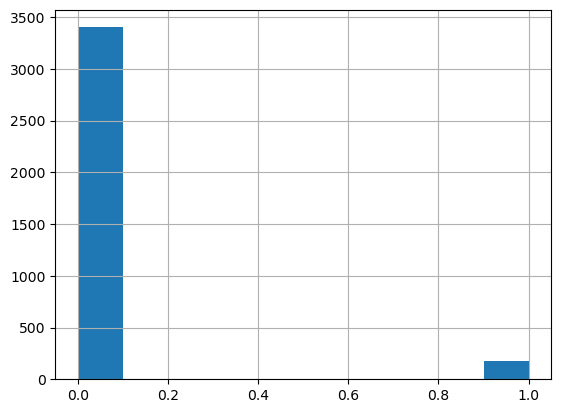

In [45]:
train_df['stroke'].hist()

<Axes: >

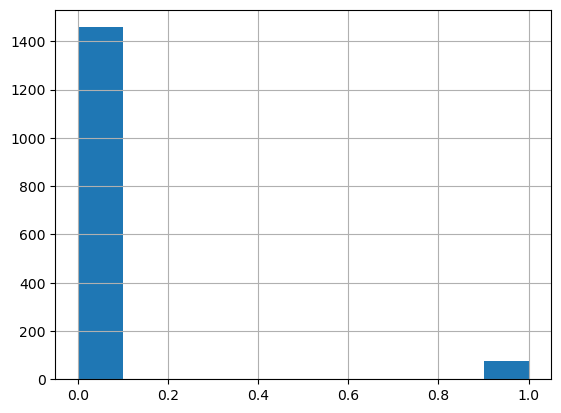

In [46]:
test_df.stroke.hist()

##### Now, the pre processing stage is described next. Here, the intial step is to understand the predictors and find out things like:
1. The degree of missingness in each predictor.
2. Unusual values in each predictor.
3. Multicollinearity between the predictors(as the project is done focused on logistic regression.)
4. Their individual distribution.


P.s. As the number of predictors increase the chances of checking each predictor individually declines. In such cases, using automated visualisation tools is considered a good pratice.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'smoking_status'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'work_type_Govt_job'}>],
       [<Axes: title={'center': 'work_type_Never_worked'}>,
        <Axes: title={'center': 'work_type_Private'}>,
        <Axes: title={'center': 'work_type_Self-employed'}>,
        <Axes: title={'center': 'work_type_children'}>]], dtype=object)

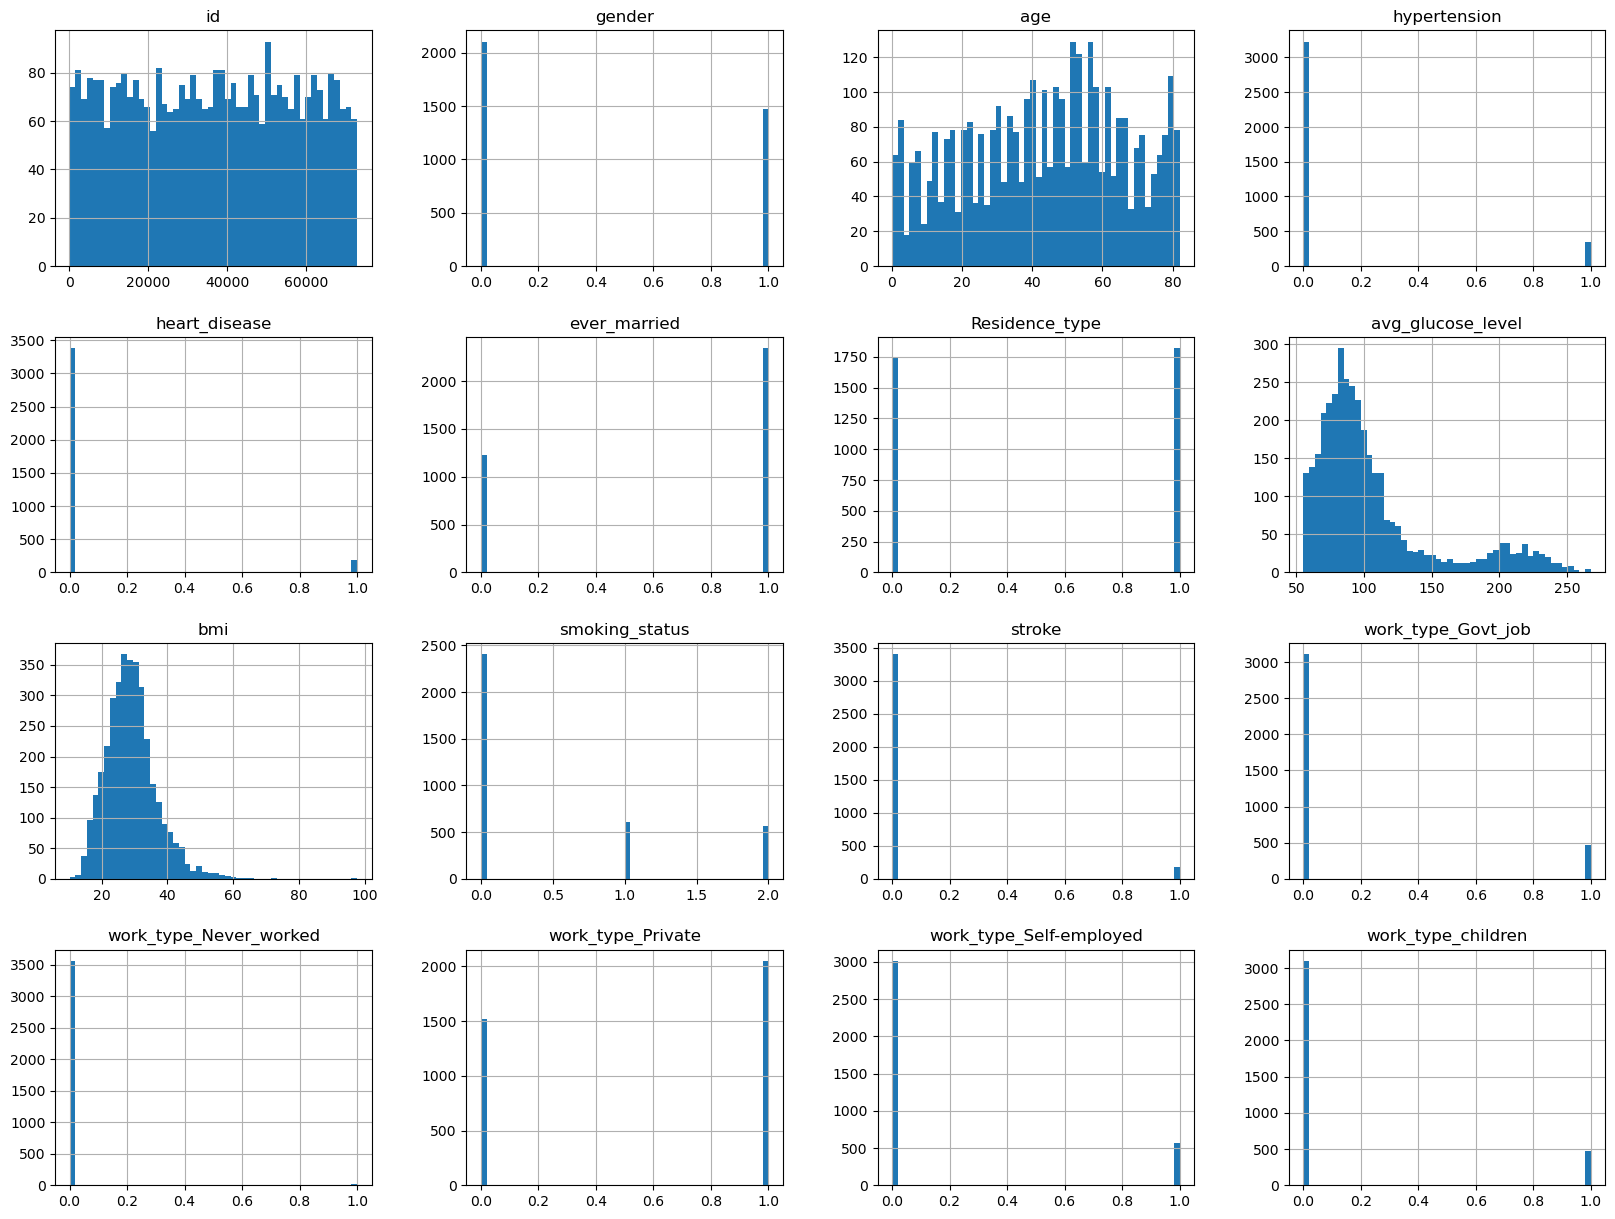

In [47]:
#looking at the distribution of all the predicrots and response.
train_df.hist(bins=50, figsize=(20, 15))

Here, most of the distributions are positively skewed. This kind of distribution might hamper our model as, we are using logistic regression. There are two types of solution we can follow:
1. Remove the data points that are causing the long tail.
2. Use logarithm function and other complex function to get the data on such a scale that makes the data symmetric in distribution.

PS. Logarithm transformation and other types of complex transformation makes sense for measurements that increase exponentially.

##### Handling the skewness of distribution

In [48]:
#Applying log transformation to BMI as it is counted on a ratio basis.
train_df['bmi'] = np.log(train_df['bmi'])

<Axes: >

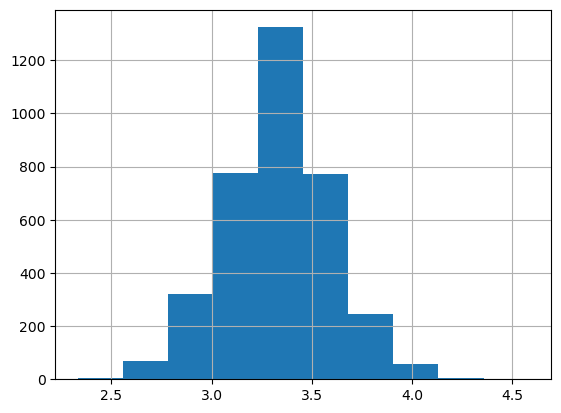

In [49]:
train_df.bmi.hist()

In [50]:
#Log transforming the column for better scale. Which will fix the skewness of the distribution.
train_df['avg_glucose_level'] = np.log(train_df['avg_glucose_level'])

<Axes: >

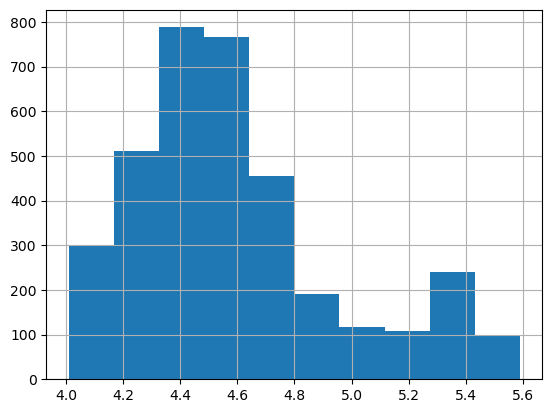

In [51]:
train_df.avg_glucose_level.hist()

##### Handling multicollinearity

Considering the threshold .7 correlation. 

In [52]:
#Creating a correlation matrix.
corr_matrix = train_df.corr()

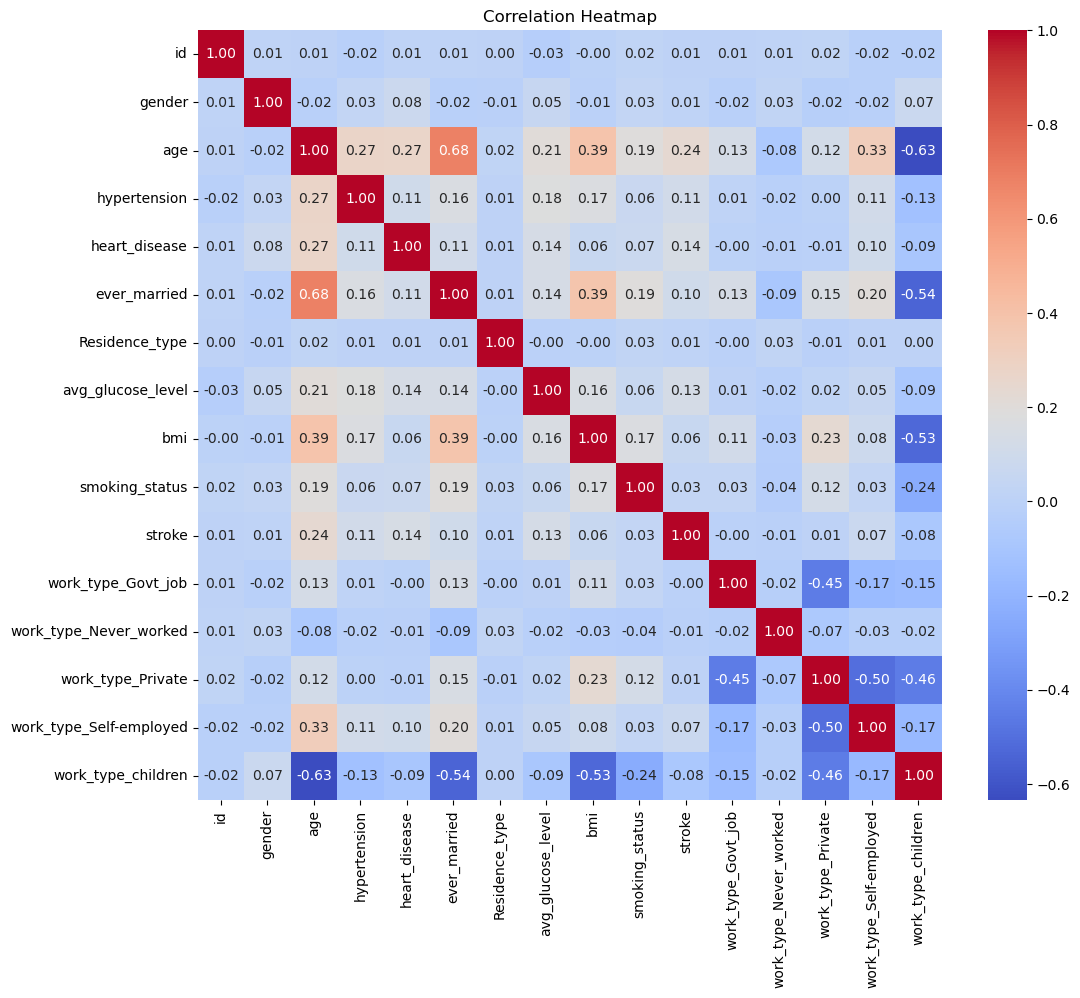

In [53]:
#Creating a heatmap to understand correlation in between predictors and label.
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

There seems to be no multicollinearity in the data

##### Exploring the relationship between individual predictors and response also, between pairs of predictors and response.

The process is first I make a null model, which only has the intercept term. Then I compare the result of the first model with other models that contain a single term. Based on ROC curve I judge whether inclusion of a term has improved the overall performance of a model or not.

In [54]:
#Creating a list of column names.
predictors = list(train_df.columns)

In [56]:
#Removing the target column.
predictors.remove('stroke')

In [57]:
#As work_type is onehot encodded, it needs to be handled differently.So, creating a function that removes any 
#column name that starts wtih work_type. 
def remove_work_type_elements(my_list):

    return [item for item in my_list if not item.startswith('work_type')]

In [58]:
predictors = remove_work_type_elements(predictors)

In [60]:
#Id column os not needed here.
predictors.remove('id')

In [61]:
#Creating a copy of train_df. To work with the data freely, without harming the original one
experiment_df = train_df.copy()

In [62]:
#Adding a null column for the null model.
experiment_df['null_model'] = np.ones((len(train_df), 1))

In [63]:
predictors.insert(0, 'null_model')

In [65]:
#importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer

#Creating the regression model
logreg = LogisticRegression()

#This will store the values that we get through cross validation
results = {'predictor':[], 'auc':[], 'improvement':[]  }
bench_mark = []

#Loop through each column, and compare the scores and store them.
for predictor in predictors:
    x = experiment_df[[predictor]]
        
        
    scores = cross_val_score(logreg, x, experiment_df['stroke'], cv=10, scoring='roc_auc')
    
    if predictor == 'null_model':
        bench_mark.append(scores.mean())
        
    else:
        results['predictor'].append(predictor)
        results['auc'].append(scores.mean())
        results['improvement'].append(scores.mean() - bench_mark[0])

In [66]:
#Doing the whole process separately for work_type dummy columns
x = experiment_df[[ 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children']]

scores = cross_val_score(logreg, x, experiment_df['stroke'], cv=10, scoring='roc_auc')
results['predictor'].append([ 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children'])
results['auc'].append(scores.mean())
results['improvement'].append(scores.mean() - bench_mark[0])

In [67]:
results = pd.DataFrame(results)

In [68]:
results

,predictor,auc,improvement
0,gender,0.516331,0.016331
1,age,0.824602,0.324602
2,hypertension,0.575926,0.075926
3,heart_disease,0.574668,0.074668
4,ever_married,0.614614,0.114614
5,Residence_type,0.475151,-0.024849
6,avg_glucose_level,0.621580,0.121580
7,bmi,0.582856,0.082856
8,smoking_status,0.549682,0.049682
9,"[work_type_Govt_job, work_type_Never_worked, w...",0.597966,0.097966


##### Here, the most important predictors are age, ever_married, avg_glucose_level and wroktype according to the result we genrated.
##### Next, we are going to build a model for prediction using the selected predictors.

In [70]:
#Filtering the names of predictors based on the result.
selected_predictors = results[results['improvement'] >= .09]

In [72]:
#Transfering the selected predictors column names into a list.
predictor_name = selected_predictors['predictor'].tolist()

In [74]:
#flattening the list, as work_type columns are in a nested list.
predictor_name = [item for sublist in predictor_name for item in (sublist if isinstance(sublist, list) else [sublist])]

In [76]:
#Creating a new dataframe that includes only the selected predictors
final_df = train_df[predictor_name]

###### Scaling the columns

In [78]:
#Importing necessary libraries.
from sklearn.preprocessing import StandardScaler`

In [80]:
scaler = StandardScaler()

In [81]:
#Transforming the column using standard scaler.
final_df['age'] = scaler.fit_transform(final_df[['age']])

C:\Users\Ridwan\AppData\Local\Temp\ipykernel_10408\2377167657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['age'] = scaler.fit_transform(final_df[['age']])


##### Creating the Y value for training

In [103]:
#Separating the label column
result_val = train_df['stroke']

##### Preparing the test dataframe for prediction

In [88]:
#Creating a dataframe that only includes the important predictor columns
final_test = test_df[predictor_name]

##### Scaling the columns in test dataframe

In [89]:
final_test['age'] = scaler.fit_transform(final_test[['age']])

C:\Users\Ridwan\AppData\Local\Temp\ipykernel_10408\820808237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test['age'] = scaler.fit_transform(final_test[['age']])


In [92]:
final_test['avg_glucose_level'] = np.log(final_test['avg_glucose_level'])

C:\Users\Ridwan\AppData\Local\Temp\ipykernel_10408\2105234685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test['avg_glucose_level'] = np.log(final_test['avg_glucose_level'])


##### Creating the model that will be used for prediction

In [99]:
#Importing evaluation library
from sklearn.metrics import accuracy_score

In [94]:
final_model = LogisticRegression()

In [95]:
#Training the model using training data.
final_model.fit(final_df, result_val)

LogisticRegression()

In [96]:
# Using the model to predict label column using test data set.`
y_pred = final_model.predict(final_test)

In [98]:
# Creating the y_test array of values to compare with predicted result.
y_value = test_df['stroke']

In [100]:
#Checking the accuracy rate.
accuracy = accuracy_score(y_value, y_pred)

In [101]:
accuracy

0.9510763209393346